# Manipulation de fichiers
Les données que l’on peut souhaiter manipuler (textes, images, . . .) sont souvent fournies sous forme de fichiers ;
l’objectif de ce chapitre est d’apprendre à effectuer un certain nombre de tâches les concernant, en particulier :
* ouvrir un fichier ;
* lire le contenu d’un fichier ;
* modifier le contenu d’un fichier ;
* fermer un fichier.
## Interaction avec le système d’exploitation
Les instructions permettant à l’interprète de dialoguer avec le système d’exploitation ne sont pas directement accessibles ; elles font partie d’un module additionnel, nommé `os`, qu’il va falloir commencer par importer :


In [1]:
import os

### Obtenir le répertoire courant
La première commande de ce module que nous allons utiliser est la fonction  `getcwd()` , qui indique le répertoire
courant :

In [2]:
print(os.getcwd())

/home/ahmed/Bureau/notebooks/1ereTD6


### Obtenir la liste des fichiers et répertoires
Enfin, la fonction `listdir` permet d’obtenir la liste des fichiers et répertoires contenus dans un répertoire dont le nom a été passé en argument (sous la forme d’une chaîne de caractères). Là encore, quel que soit votre
système d’exploitation, vous pouvez utiliser les conventions lexicales du monde unix. Poursuivons le même exemple, en visualisant le contenu du répertoire courant :

In [11]:
print(os.listdir("."))

['__pycache__', 'question3.py', 'conjecture.py', 'indice_occurrence.py', 'question1.py', '.ipynb_checkpoints', 'figures', 'question2.py', 'scripts', 'Cours3.ipynb', 'question4.py', 'exemple.txt', 'planetes.csv', 'parfait.py', 'premier.py', 'premiers_jumeaux.py', 'occurrence.py', 'td6.ipynb', 'goldbach.py']


Nous avons ici utilisé la description relative du répertoire à partir du répertoire courant (représenté, rappelons-le, par un point), mais nous aurions pu évidemment utiliser sa description absolue pour obtenir le même
résultat :

In [12]:
os.listdir('/home/ahmed/Bureau/notebooks/1ereTD6')

['__pycache__',
 'question3.py',
 'conjecture.py',
 'indice_occurrence.py',
 'question1.py',
 '.ipynb_checkpoints',
 'figures',
 'question2.py',
 'scripts',
 'Cours3.ipynb',
 'question4.py',
 'exemple.txt',
 'planetes.csv',
 'parfait.py',
 'premier.py',
 'premiers_jumeaux.py',
 'occurrence.py',
 'td6.ipynb',
 'goldbach.py']

Il existe dans le module `os` bien d’autres fonctions permettant d’interagir avec le système d’exploitation mais
dont nous n’aurons pas l’usage par la suite.

## Lecture et écriture dans un fichier texte
Désormais, nous supposerons que dans le répertoire courant se trouve un fichier nommé **exemple.txt** contenant le texte suivant :
```
Am, stram, gram,
Pic et pic et colégram,
Bour et bour et ratatam,
Am, stram, gram.
```

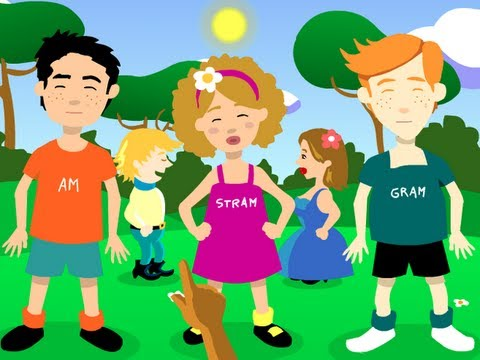

In [4]:
# ******* AND JUST FOR FUN! :-) ******
from IPython.display import YouTubeVideo
YouTubeVideo('D3jZmWdcebs', start=2, width=400, height=400)

La première chose à faire est d’ouvrir ce fichier, à l’aide de la commande `open` . Cette fonction prend deux arguments : le premier est une chaîne de caractères décrivant (sous forme relative ou absolue) le chemin menant
au fichier à ouvrir, le second indiquant le mode d’ouverture : **'r'** (comme read) pour lire le contenu du fichier, **'w'** (comme write) pour écrire dans ce fichier, **'a'** (comme append) pour ajouter du texte à la suite de ce fichier, etc.

Pour l’instant, nous voulons seulement lire son contenu, donc nous écrivons :

In [13]:
comptine = open('exemple.txt', 'r')

Nous venons de créer une objet nommé comptine faisant référence au fichier **exemple.txt** :

In [14]:
print(comptine)

<_io.TextIOWrapper name='exemple.txt' mode='r' encoding='UTF-8'>


Nous allons désormais faire agir des méthodes sur cet objet, qui se répercuteront sur le fichier lié.

## Lecture complète ou partielle
L’objet que nous venons de créer est ce qu’on appelle un flux : les caractères sont lisibles uniquement les uns
après les autres, sans possibilité de retour en arrière ni de saut en avant. Ce n’est guère pratique, aussi notre
première tâche sera de convertir ce *flux* en chaîne de caractères.

Le moyen le plus simple est d’utiliser la méthode `read()` , prise sans argument, qui lit le flux dans son entier et
le convertit en chaîne de caractères :

In [1]:
comptine = open('exemple.txt', 'r')
lst = []
while True:
    txt = comptine.read(10)
    if len(txt) == 0:
        break
    lst.append(txt)

In [2]:
print(lst)

['Am, stram,', ' gram,\nPic', ' et pic et', ' colégram,', '\nBour et b', 'our et rat', 'atam,\nAm, ', 'stram, gra', 'm.']


## Lecture par lignes
Plus intéressant, la méthode readline() permet de lire une ligne de texte (en incluant le caractère de fin de ligne), et surtout la méthode `readlines()` , qui fournit la liste des lignes du texte

In [29]:
comptine = open('exemple.txt', 'r')
print(comptine.readlines())

['Am, stram, gram,\n', 'Pic et pic et colégram,\n', 'Bour et bour et ratatam,\n', 'Am, stram, gram.']


Mieux encore, un parcours par énumération est possible, l’énumération du fichier se faisant ligne par ligne :

In [3]:
comptine = open('exemple.txt', 'r')
for n, l in enumerate(comptine):
    print('{} :'.format(n), l, end='')

0 : Am, stram, gram,
1 : Pic et pic et colégram,
2 : Bour et bour et ratatam,
3 : Am, stram, gram.

### Fermeture d’un fichier
Enfin, une fois le fichier lu, n’oublions pas de le **refermer**, afin qu’il soit disponible de nouveau pour tout autre usage : c’est le rôle la méthode `close()` :

In [31]:
comptine.close()

Sinon, pour eviter l'utilisation de `close()` vous pouvez utilser l'instruction :

In [33]:
with open('exemple.txt', 'r') as f:
    for n, l in enumerate(f):
        print('{} :'.format(n), l, end='')

0 : Am, stram, gram,
1 : Pic et pic et colégram,
2 : Bour et bour et ratatam,
3 : Am, stram, gram.

## Fichiers CSV
De nombreuses données scientifiques se présentent sous forme de tableaux ; une façon simple de les transmettre
est de les représenter par un fichier **CSV** (pour *comma-separated value*) : il s’agit d’un simple fichier texte, chaque
ligne de texte correspondant à une ligne du tableau et un caractère spécial (virgule ou point-virgule le plus
souvent) aux séparations entre les colonnes. Par exemple, le tableau suivant :
![](figures/tab1.png)

sera représenté par le fichier planetes.csv contenant le texte suivant
```
Mercure, 2439, 3.7, 88
Vénus, 6052, 8.9, 225
Terre, 6378, 9.8, 365
Mars, 3396, 3.7, 687
```
Ce format est facile à générer et à intégrer, c’est pourquoi de nombreuses données publiques de l’Open Data sont diffusées sous ce format.

Nous allons maintenant nous intéresser à la manière d’intégrer ce fichier de données au sein d’un environnement Python.

On commence par découper le texte en lignes :


In [34]:
planetes = open('planetes.csv', 'r')
lignes = planetes.readlines()
print(lignes)
planetes.close()

['Mercure, 2439, 3.7, 88\n', 'Vénus, 6052, 8.9, 225\n', 'Terre, 6378, 9.8, 365\n', 'Mars, 3396, 3.7, 687\n']


Ou bien,

In [35]:
with open('planetes.csv', 'r') as f:
    lignes = f.readlines()
    print(lignes)

['Mercure, 2439, 3.7, 88\n', 'Vénus, 6052, 8.9, 225\n', 'Terre, 6378, 9.8, 365\n', 'Mars, 3396, 3.7, 687\n']


et chaque ligne doit ensuite être découpée en colonnes. On utilise pour se faire la méthode split qui découpe une chaîne de caractères en une liste de sous-chaînes, le séparateur de ces sous-chaînes étant indiqué en paramètre. Dans le cas de notre fichier CSV cela donne :

In [36]:
tab = []
for chn in lignes:
    tab.append(chn.split(','))

À cette étape, tab est une liste de listes égale à :

In [39]:
tab

[['Mercure', ' 2439', ' 3.7', ' 88\n'],
 ['Vénus', ' 6052', ' 8.9', ' 225\n'],
 ['Terre', ' 6378', ' 9.8', ' 365\n'],
 ['Mars', ' 3396', ' 3.7', ' 687\n']]

Il reste à convertir le deuxième et le quatrième terme de chacune de ces listes en un entier et le troisième en un flottant :

In [40]:
for lst in tab:
    lst[1] = int(lst[1])
    lst[2] = float(lst[2])
    lst[3] = int(lst[3])
    

et la liste tab est maintenant prête à être utilisée :

In [41]:
tab

[['Mercure', 2439, 3.7, 88],
 ['Vénus', 6052, 8.9, 225],
 ['Terre', 6378, 9.8, 365],
 ['Mars', 3396, 3.7, 687]]

### Écrire dans un fichier
Deux modes d’ouverture sont possibles pour écrire dans un fichier : le mode **'w'** (write pour écrire) et le mode **'a'** (append pour ajouter). Le premier crée un nouveau fichier (s’il existe déjà un fichier du même nom, ce
dernier sera effacé) et l’écriture commencera au début du fichier, tandis que le second ajoutera à la suite des données existantes celles que nous allons lui fournir. Dans les deux cas, la méthode write permet d’enregistrer
les chaînes de caractères passées en argument les unes à la suite des autres.

Par exemple, pour ajouter au fichier **planetes.csv** des données supplémentaires, on procède ainsi :

In [42]:
planetes.close()

In [46]:
planetes = open('planetes.csv', 'a')
planetes.write('Jupiter, 71492, 24.8, 4335\n')
planetes.write('Saturne, 60268, 10.4, 10757\n')
planetes.close()

(Ne pas oublier de fermer le fichier pour enregistrer les modifications.)